In [8]:
print("hello world")

hello world


In [9]:
import os
import numpy as np
import csv 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import jinja2

import sys

In [32]:
BWA = pd.read_csv('data/BWA.csv', sep = ',', on_bad_lines= 'skip')

In [34]:
BWA

,Date,High,Low,Open,Close,Volume,Adj Close
0,2017-11-13,52.259998,51.580002,51.770000,52.029999,923000.0,47.885578
1,2017-11-14,52.380001,51.650002,51.849998,52.070000,1448900.0,47.922390
2,2017-11-15,52.000000,51.250000,51.610001,51.680000,1063600.0,47.563442
3,2017-11-16,52.169998,51.560001,51.919998,52.040001,1130400.0,47.894783
4,2017-11-17,52.150002,51.540001,51.730000,51.939999,1875900.0,47.802738
...,...,...,...,...,...,...,...
1254,2022-11-07,38.410000,37.419998,38.349998,38.259998,1549300.0,38.259998
1255,2022-11-08,39.099998,38.189999,38.410000,38.849998,2660700.0,38.849998
1256,2022-11-09,39.060001,38.349998,38.360001,38.540001,1807800.0,38.540001
1257,2022-11-10,41.040001,40.000000,40.000000,40.970001,2085600.0,40.970001


In [33]:
EPAM= pd.read_csv('data/EPAM.csv', sep = ',', on_bad_lines= 'skip')
GOOGL= pd.read_csv('data/GOOGL.csv', sep = ',', on_bad_lines= 'skip')
IPG = pd.read_csv('data/IPG.csv', sep = ',', on_bad_lines= 'skip')
ITW = pd.read_csv('data/ITW.csv', sep = ',', on_bad_lines= 'skip')


In [35]:
BWA = BWA.set_index(['Date']) 
EPAM = EPAM.set_index(['Date']) 
GOOGL = GOOGL.set_index(['Date']) 
IPG = IPG.set_index(['Date']) 
ITW = ITW.set_index(['Date']) 

In [36]:

BWA ["company"] = "BWA"
EPAM ["company"] = "EPAM"
GOOGL ["company"] = "GOOGL"
IPG ["company"] = "IPG"
ITW ["company"] = "ITW"

In [51]:
df = pd.merge(BWA, EPAM, left_index=True, right_index=True)
df_1 = pd.merge(df, GOOGL, left_index=True, right_index=True)


In [60]:
df_2 = df_1 = pd.merge(IPG, ITW, left_index=True, right_index=True)

In [56]:
def add_prefix(sdf, prefix):

      for c in sdf.columns:

          sdf = sdf.withColumnRenamed(c, '{}{}'.format(prefix, c))

      return sdf

In [63]:
df = pd.merge(df_1, df_2, left_index=True, right_index=True)

In [71]:
BWA_diff = BWA["Adj Close"]-BWA["Close"]
EPAM_diff = EPAM["Adj Close"]-EPAM["Close"]
GOOGL_diff = GOOGL["Adj Close"]-GOOGL["Close"]
IPG_diff = IPG["Adj Close"]-IPG["Close"]
ITW_diff = ITW["Adj Close"]-ITW["Close"]

In [80]:
BWA_diff



Date
2017-11-13   -4.144421
2017-11-14   -4.147610
2017-11-15   -4.116558
2017-11-16   -4.145218
2017-11-17   -4.137260
                ...   
2022-11-07    0.000000
2022-11-08    0.000000
2022-11-09    0.000000
2022-11-10    0.000000
2022-11-11    0.000000
Length: 1259, dtype: float64

In [85]:
EPAM_diff.values

array([0., 0., 0., ..., 0., 0., 0.])

In [86]:
GOOGL_diff.values


array([0., 0., 0., ..., 0., 0., 0.])

In [83]:
IPG_diff


Date
2017-11-13   -3.099907
2017-11-14   -3.094931
2017-11-15   -3.063379
2017-11-16   -3.098244
2017-11-17   -3.163004
                ...   
2022-11-07    0.000000
2022-11-08    0.000000
2022-11-09    0.000000
2022-11-10    0.000000
2022-11-11    0.000000
Length: 1259, dtype: float64

In [84]:
ITW_diff

Date
2017-11-13   -15.431229
2017-11-14   -15.522293
2017-11-15   -15.258926
2017-11-16   -15.461594
2017-11-17   -15.385223
                ...    
2022-11-07     0.000000
2022-11-08     0.000000
2022-11-09     0.000000
2022-11-10     0.000000
2022-11-11     0.000000
Length: 1259, dtype: float64

In [ ]:
#EPAM and  GOOGL have the same close price and adjusted close price. It means that therewere no paying of the dividend no stock splits etc.

In [97]:
BWA_high = BWA["Adj Close"].max()
EPAM_high = EPAM["Adj Close"].max()
GOOGL_high= GOOGL["Adj Close"].max()
IPG_high = IPG["Adj Close"].max()
ITW_high = ITW["Adj Close"].max()

In [102]:
#These are the highest adjusted close prices
print(BWA_high,EPAM_high,GOOGL_high,IPG_high,ITW_high)

53.4628791809082 717.489990234375 149.8385009765625 39.13483428955078 247.5800018310547


In [103]:
BWA_low = BWA["Adj Close"].min()
EPAM_low = EPAM["Adj Close"].min()
GOOGL_low= GOOGL["Adj Close"].min()
IPG_low = IPG["Adj Close"].min()
ITW_low = ITW["Adj Close"].min()


In [104]:
#These are the lowest adjusted close prices
print(BWA_low,EPAM_low,GOOGL_low,IPG_low,ITW_low)

18.93040657043457 97.08000183105467 49.23350143432617 11.541755676269531 109.72038269042967


In [111]:
log_returns_BWA = np.log(BWA["Adj Close"] / BWA["Adj Close"].shift(1))
log_returns_EPAM = np.log(EPAM["Adj Close"] / EPAM["Adj Close"].shift(1))
log_returns_GOOGL = np.log(GOOGL["Adj Close"] / GOOGL["Adj Close"].shift(1))
log_returns_IPG = np.log(IPG["Adj Close"] / IPG["Adj Close"].shift(1))
log_returns_ITW = np.log(ITW["Adj Close"] / ITW["Adj Close"].shift(1))

In [117]:
#Here are five datapoint with mean, max, median, and min for each company

In [112]:
log_returns_BWA.aggregate([np.mean, np.median, np.min, np.max], axis = 0)

mean     -0.000096
median    0.000000
amin     -0.121998
amax      0.149779
Name: Adj Close, dtype: float64

In [113]:
log_returns_EPAM.aggregate([np.mean, np.median, np.min, np.max], axis = 0)

mean      0.001000
median    0.002035
amin     -0.610210
amax      0.224636
Name: Adj Close, dtype: float64

In [114]:
log_returns_GOOGL.aggregate([np.mean, np.median, np.min, np.max], axis = 0)

mean      0.000490
median    0.001063
amin     -0.123685
amax      0.091852
Name: Adj Close, dtype: float64

In [115]:
log_returns_IPG.aggregate([np.mean, np.median, np.min, np.max], axis = 0)

mean      0.000585
median    0.000953
amin     -0.165692
amax      0.136922
Name: Adj Close, dtype: float64

In [116]:
log_returns_ITW.aggregate([np.mean, np.median, np.min, np.max], axis = 0)

mean      0.000370
median    0.001040
amin     -0.122314
amax      0.153630
Name: Adj Close, dtype: float64

In [122]:
# HERE ARE the five days with maximal gains for each company

#BWA:
print(log_returns_BWA.idxmax())
#EPAM:
print(log_returns_EPAM.idxmax())
#GOOGL:
print(log_returns_GOOGL.idxmax())
#IPG:
print(log_returns_IPG.idxmax())
#ITW:
print(log_returns_ITW.idxmax())

2020-04-06
2022-03-16
2019-07-26
2020-03-24
2020-03-24


In [123]:
# HERE ARE the five days with maximal losses for each company

#BWA:
print(log_returns_BWA.idxmin())
#EPAM:
print(log_returns_EPAM.idxmin())
#GOOGL:
print(log_returns_GOOGL.idxmin())
#IPG:
print(log_returns_IPG.idxmin())
#ITW:
print(log_returns_ITW.idxmin())

2020-03-18
2022-02-28
2020-03-16
2020-03-12
2020-03-12


In [137]:
BWA.index = pd.to_datetime(BWA.index)
EPAM.index = pd.to_datetime(EPAM.index)
GOOGL.index = pd.to_datetime(GOOGL.index)
IPG.index = pd.to_datetime(IPG.index)
ITW.index = pd.to_datetime(ITW.index)


In [138]:
weekly_BWA = BWA.resample('W').sum()
weekly_EPAM = EPAM.resample('W').sum()
weekly_GOOGL = GOOGL.resample('W').sum()
weekly_IPG = IPG.resample('W').sum()
weekly_ITW = ITW.resample('W').sum()

In [145]:
#average weekly volume
#BWA:
print(weekly_BWA ["Volume"].mean())
#EPAM:
print(weekly_EPAM ["Volume"].mean())
#GOOGL:
print(weekly_GOOGL ["Volume"].mean())
#IPG:
print(weekly_IPG ["Volume"].mean())
#ITW:
print(weekly_ITW ["Volume"].mean())

10252653.25670498
2098647.1264367816
170304469.348659
19628102.681992337
6113914.176245211


In [150]:
len(BWA)

1259

In [162]:
BWA["Adj Close"][0]

47.88557815551758

In [165]:
return_BWA= (BWA["Adj Close"][1258]-BWA["Adj Close"][0])/BWA["Adj Close"][0]
return_EPAM= (EPAM["Adj Close"][1258]-EPAM["Adj Close"][0])/EPAM["Adj Close"][0]
return_GOOGL= (GOOGL["Adj Close"][1258]-GOOGL["Adj Close"][0])/GOOGL["Adj Close"][0]
return_IPG= (IPG["Adj Close"][1258]-IPG["Adj Close"][0])/IPG["Adj Close"][0]
return_ITW= (ITW["Adj Close"][1258]-ITW["Adj Close"][0])/ITW["Adj Close"][0]

In [166]:
#average weekly volume
#BWA:
print(return_BWA)
#EPAM:
print(return_EPAM)
#GOOGL:
print(return_GOOGL)
#IPG:
print(return_IPG)
#ITW:
print(return_ITW)


-0.11413833135358101
2.5189020349846145
0.8519016734327592
1.0866928254842791
0.5925724321161541


In [167]:
#The highest total return was recorded by company EPAM with return 2.5189020349846145.

In [ ]:

#BWA:
print(log_returns_BWA.idxmax())
#EPAM:
print(log_returns_EPAM.idxmax())
#GOOGL:
print(log_returns_GOOGL.idxmax())
#IPG:
print(log_returns_IPG.idxmax())
#ITW:
print(log_returns_ITW.idxmax())

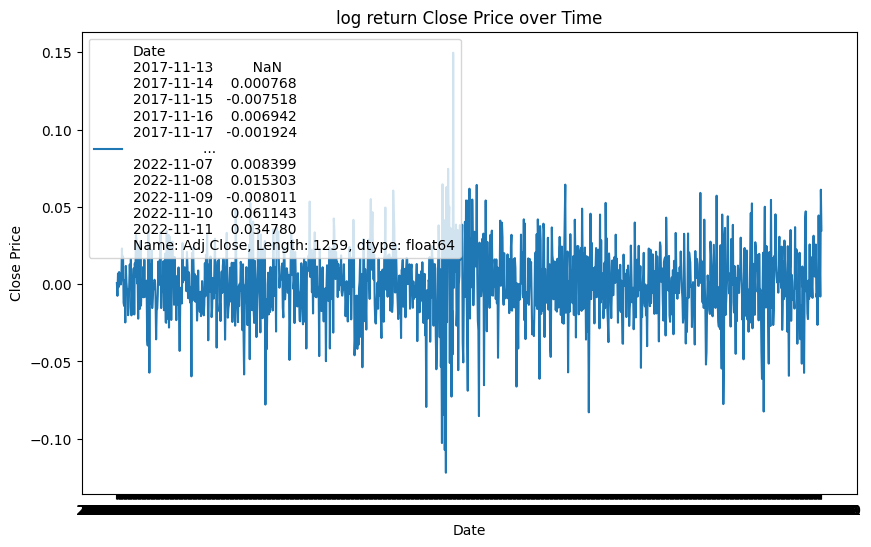

In [173]:
plt.figure(figsize=(10, 6))
plt.plot(log_returns_BWA.index, log_returns_BWA, label=log_returns_BWA)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title(f'{"log return"} Close Price over Time')
plt.legend()
plt.show()